In [1]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import cv2 # To resize images | Open CV

from os import listdir
from os.path import isfile, join

import numpy as np
import random
"""
conda install matplotlib
conda install scikit-learn
conda install opencv
"""

'\nconda install matplotlib\nconda install scikit-learn\nconda install opencv\n'

In [2]:
# load image as pixel array
data = image.imread('train/apple_1.jpg')
# summarize shape of the pixel array


In [41]:
# Old code that detect automatically classes, don't work because don't label same if called on train and test dataset
"""
def extract_images(path_dir:str,width=50,length=100,verbose=False):
        
    X = []
    labels = []
    labels_name = []
    nb_per_label = []
    
    files = [f for f in listdir(path_dir) if isfile(join(path_dir, f))] # list all file in given directory
    random.shuffle(files)
    if(verbose): print("Starting extraction...\n")
        
    for file in files:
        name,extension = file.split(".")
        if(extension=="jpg"): # Take only those with jpg extension
            
            image_data = image.imread(f'{path_dir}/{file}') # Extract image data
            if(image_data.shape[2]== 3): # Only take RGB not RGBA (not same format) (TODO just remove last feature)
                # Find the label of current image
                label = name.split("_")[0] 
                if(label not in labels_name):
                    i_label = np.size(labels_name) 
                    labels_name.append(label)
                    nb_per_label.append(1)
                else:
                    i_label = labels_name.index(label)
                    nb_per_label[i_label]+=1

                # Add data and label to X and labels
                image_data_resized = cv2.resize(image_data, (length, width)) # Resize image
                X.append(image_data_resized)
                labels.append(i_label)
            
    if(verbose): print(f'Extraction finished, {np.sum(nb_per_label)} images extracted :\n\tlabels_name : {labels_name}\n\tnb_per_label : {nb_per_label}')

    return X,labels,labels_name,nb_per_label
                                  
X,labels,labels_name,nb_per_label = extract_images("train/",length=200,width=120,verbose=True)
"""

IndentationError: unexpected indent (Temp/ipykernel_14504/3069899126.py, line 4)

In [3]:
def extract_images(path_dir:str,labels_name,width=50,length=100,verbose=False):
    """
    Load each images from a given directory (path_dir), resize them by the given shape (width by length) and return informations :
        X : array of image data | array(array(array(array(float32))))
            shape : (nb_images,width,length,3)
            Each float represent value RGB of the pixel (we filter RGBA)
        labels : array of image label | array(int)
        labels_name : array of label name | array(string)
        nb_per_label : array of number per label | array(int)
    """
    X = []
    labels = []
    nb_per_label = np.zeros(np.size(labels_name))
    
    files = [f for f in listdir(path_dir) if isfile(join(path_dir, f))] # list all file in given directory
    random.shuffle(files) # Shuffle those file
    
    if(verbose): print("Starting extraction...\n")
        
    for file in files:
        name,extension = file.split(".")
        if(extension=="jpg"): # Take only those with jpg extension
            
            image_data = image.imread(f'{path_dir}/{file}') # Extract image data
            if(image_data.shape[2]== 3): # Only take RGB not RGBA (not same format) (TODO just remove last feature)
                
                # Find the label of current image
                label = name.split("_")[0] 
                if(label in labels_name):
                    i_label = labels_name.index(label)
                    nb_per_label[i_label]+=1

                    # Add data and label to X and labels
                    image_data_resized = cv2.resize(image_data, (length, width)) # Resize image
                    X.append(image_data_resized)
                    labels.append(i_label)
            
    if(verbose): print(f'Extraction finished, {np.sum(nb_per_label)} images extracted :\n\tlabels_name : {labels_name}\n\tnb_per_label : {nb_per_label}')

    return X,labels,labels_name,nb_per_label

labels_name = ["apple","orange","banana"]
X,labels,labels_name,nb_per_label = extract_images("train/",labels_name=labels_name,length=200,width=120,verbose=True)

Starting extraction...

Extraction finished, 195.0 images extracted :
	labels_name : ['apple', 'orange', 'banana']
	nb_per_label : [68. 61. 66.]


uint8
(120, 200, 3)


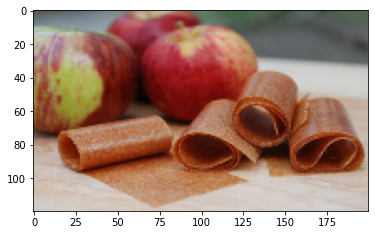

In [4]:
image0 = X[0]
print(image0.dtype)
print(image0.shape)
#print(image) # Data
# display the array of pixels as an image
pyplot.imshow(image0)
pyplot.show()

In [5]:
# TO test the filter RGB
b_shape = (120, 200, 4)
for i in X:
    if(i.shape!=b_shape):
        print(i.shape)
        b_shape = i.shape
        print(b_shape[2])

(120, 200, 3)
3


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

In [7]:
labels_name = ["apple","banana","orange"]

# Extract train and test data
X_train,y_train,_,_ = extract_images("train/",labels_name=labels_name,length=200,width=120,verbose=True)
X_test,y_test,_,_ = extract_images("test/",labels_name=labels_name,length=200,width=120,verbose=True)

# Reshaping
# Train
nsamples, width, length, rgb = np.shape(X_train)
d2_X_train = np.reshape(X_train,(nsamples,width*length*3)) # 3 RGB
# Test
nsamples, width, length, rgb = np.shape(X_test)
d2_X_test = np.reshape(X_test,(nsamples,width*length*3))

# Transform data to scaled
scaler = preprocessing.StandardScaler().fit(d2_X_train)
X_train_scaled = scaler.transform(d2_X_train) # Train
X_test_scaled = scaler.transform(d2_X_test) # Test

Starting extraction...

Extraction finished, 195.0 images extracted :
	labels_name : ['apple', 'banana', 'orange']
	nb_per_label : [68. 66. 61.]
Starting extraction...

Extraction finished, 52.0 images extracted :
	labels_name : ['apple', 'banana', 'orange']
	nb_per_label : [17. 17. 18.]


In [9]:
# Training and testing our model
clf = MLPClassifier(random_state=1, max_iter=300, solver='lbfgs').fit(X_train_scaled, y_train)
print(y_test)
#print(clf.predict_proba(X_test_scaled))
print(clf.predict(X_test_scaled))
print(clf.score(X_test_scaled, y_test))

[1, 1, 2, 0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2]
[1 0 1 0 0 1 1 0 1 2 2 0 2 1 1 2 0 2 2 1 1 0 1 0 1 2 0 0 1 0 0 2 2 1 0 2 2
 1 0 1 1 0 1 2 1 0 1 2 1 2 0 1]
0.8076923076923077


In [72]:
predictions = clf.predict(X_test_scaled)
test = predictions -y_test

for i,value in enumerate(test):
    if(value!=0):
        print(f'Predicted {labels_name[predictions[i]]} instead of {labels_name[y_test[i]]} at index {i}')

Predicted banana instead of orange at index 12
Predicted orange instead of apple at index 15
Predicted banana instead of orange at index 18
Predicted orange instead of banana at index 23
Predicted banana instead of orange at index 27
Predicted apple instead of banana at index 36
Predicted banana instead of orange at index 48


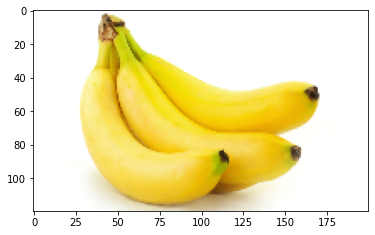

		predicted => banana


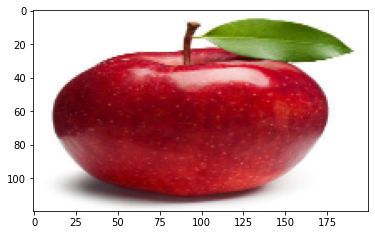

		predicted => apple


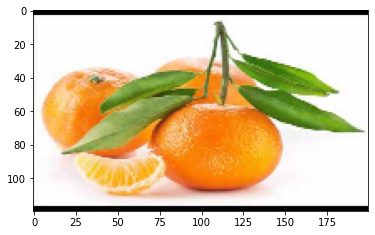

		predicted => banana


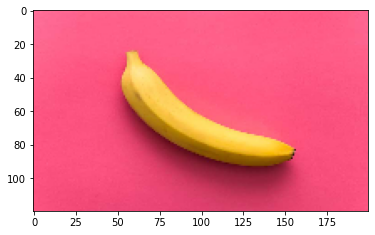

		predicted => apple


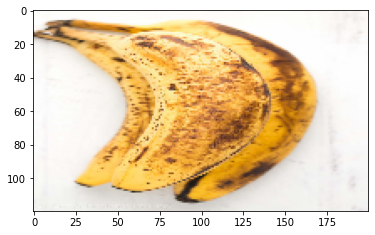

		predicted => orange


In [75]:
i_banana_image = 5
i_apple_image = 0
i_orange_image = 7


index = i_banana_image
pyplot.imshow(X_test[index])
pyplot.show()
print(f'\t\tpredicted => {labels_name[clf.predict([X_test_scaled[index]])[0]]}')

index = i_apple_image
pyplot.imshow(X_test[index])
pyplot.show()
print(f'\t\tpredicted => {labels_name[clf.predict([X_test_scaled[index]])[0]]}')

index = 12
pyplot.imshow(X_test[index])
pyplot.show()
print(f'\t\tpredicted => {labels_name[clf.predict([X_test_scaled[index]])[0]]}')

index = 36
pyplot.imshow(X_test[index])
pyplot.show()
print(f'\t\tpredicted => {labels_name[clf.predict([X_test_scaled[index]])[0]]}')

index = 23
pyplot.imshow(X_test[index])
pyplot.show()
print(f'\t\tpredicted => {labels_name[clf.predict([X_test_scaled[index]])[0]]}')
